In [1]:
# import numpy as np

In [2]:
# pip list

In [3]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score


In [4]:
df=pd.read_csv(r"OnlineRetail.csv",encoding='latin1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.shape


(541909, 8)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

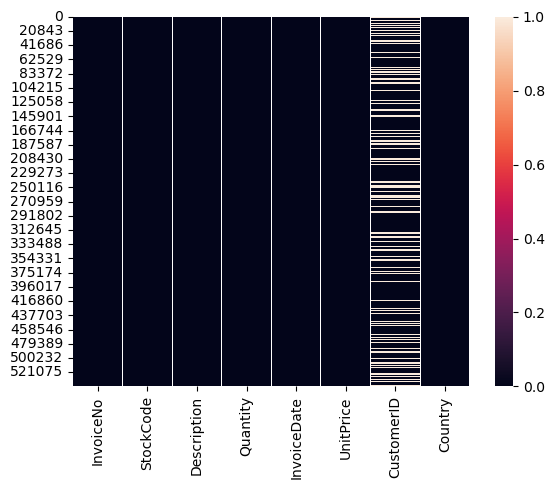

In [10]:
sns.heatmap(df.isnull())


In [11]:
#remove the null values
df=df.dropna()

In [12]:
#calculate the total amount
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=6, column = 'TotalAmount', value=TotalAmount)


In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,10.20,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12.60,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,16.60,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,16.60,12680.0,France


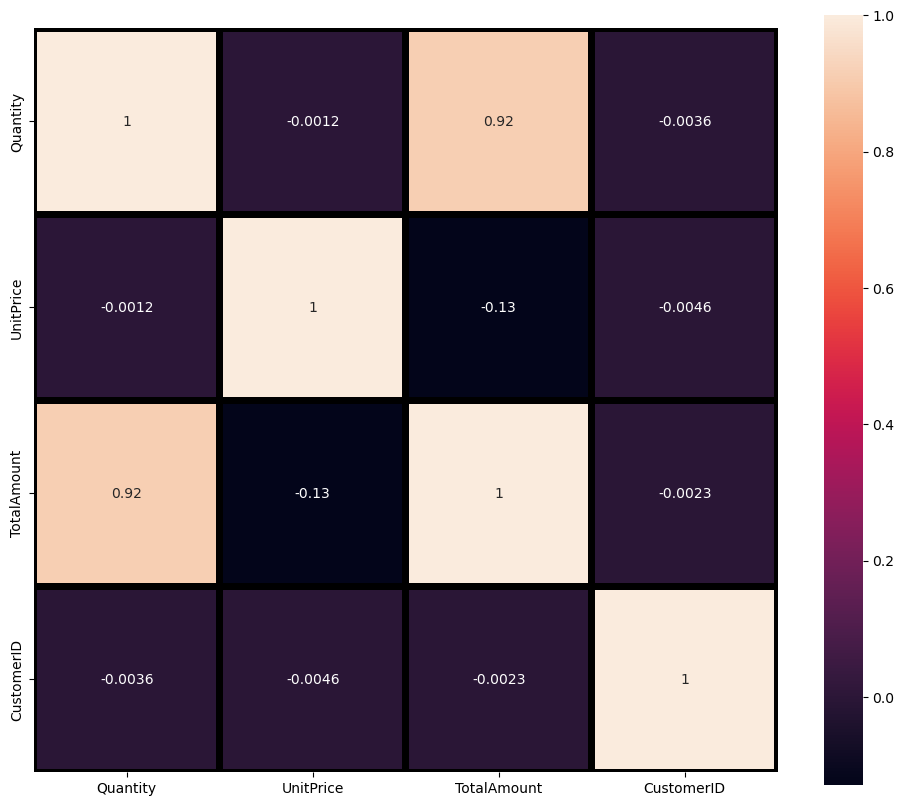

In [14]:
#correlation matrix
df_corr=df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,square=True,annot=True,linewidths=4,linecolor='k')


In [15]:
#convert datatype pf the required columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#split date and time
df['month']= pd.to_datetime(df['InvoiceDate']).dt.month
#df['day'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df['day_number'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['m_y']=pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

df['m_y']=df['m_y'].astype(str)


In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09


In [17]:
#finding unique values of certain columns
df['year'].unique()



array([2010, 2011], dtype=int64)

In [18]:
df['month'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12,  4, 11], dtype=int64)

In [19]:
#create a new column showing a specific number with respect to each country
df['Country_Category']=df["Country"].astype('category').cat.codes
df['InvoiceNo']=df["InvoiceNo"].astype('category').cat.codes
df['StockCode']=df["StockCode"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes


In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [21]:
#create a dataframe showing the number represented by each country
a=df['Country'].unique()
b=df['Country_Category'].unique()
data = a,b
Countries = pd.DataFrame(data=data)


In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [23]:
Countries

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,United Kingdom,France,Australia,Netherlands,Germany,Norway,EIRE,Switzerland,Spain,Poland,...,Saudi Arabia,Czech Republic,Canada,Unspecified,Brazil,USA,European Community,Bahrain,Malta,RSA
1,35,13,0,23,14,24,10,32,30,25,...,28,8,5,36,4,33,11,2,22,27


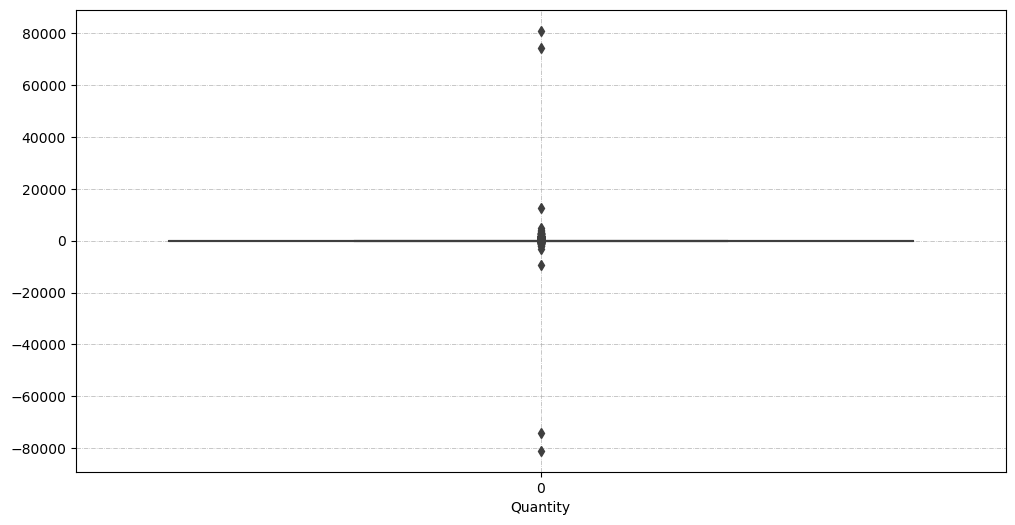

In [24]:
#boxplot of Quantity
plt.figure(figsize = (12,6))
sns.boxplot(df['Quantity'])
plt.xlabel("Quantity")
plt.grid(linestyle='-.',linewidth = .5)


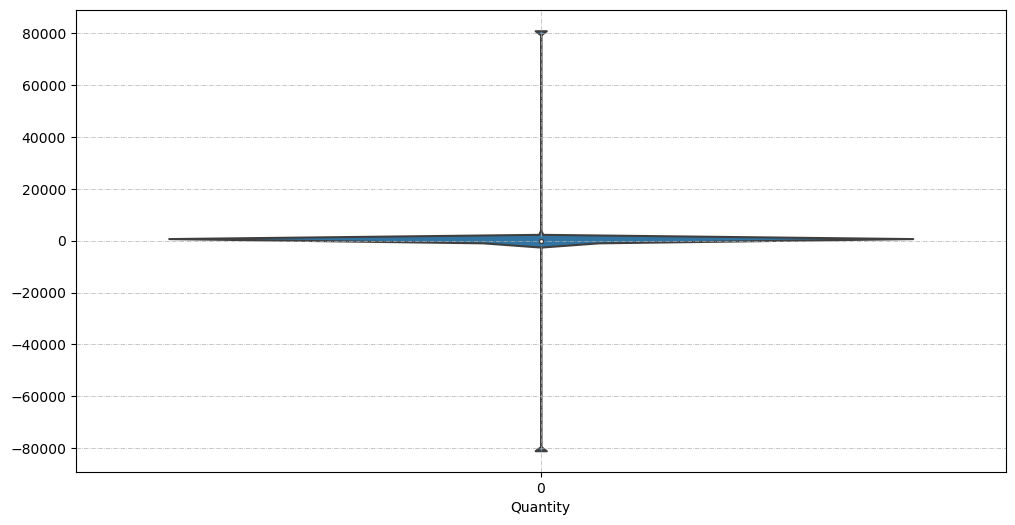

In [25]:
#violin plot of Quantity
plt.figure(figsize = (12,6))
sns.violinplot(df['Quantity'])
plt.xlabel("Quantity")
plt.grid(linestyle='-.',linewidth = .5)


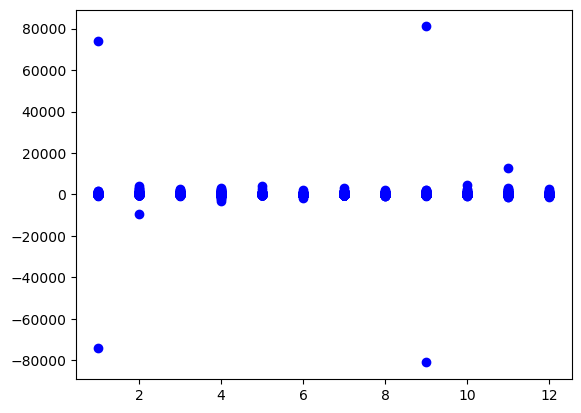

In [26]:
#scatter plot of quantity vs month
plt.scatter(df['month'],df['Quantity'],color="blue")
plt.show()


### removing outliers of Quantity 

In [27]:

max_quantity=df['Quantity'].quantile(0.90)


In [28]:
a1=df[df['Quantity']>max_quantity]


In [29]:
min_quantity=df['Quantity'].quantile(0.10)


In [30]:
b1=df[df['Quantity']<min_quantity]


In [31]:
df=df[(df['Quantity']<max_quantity) & (df['Quantity']>min_quantity)]


In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


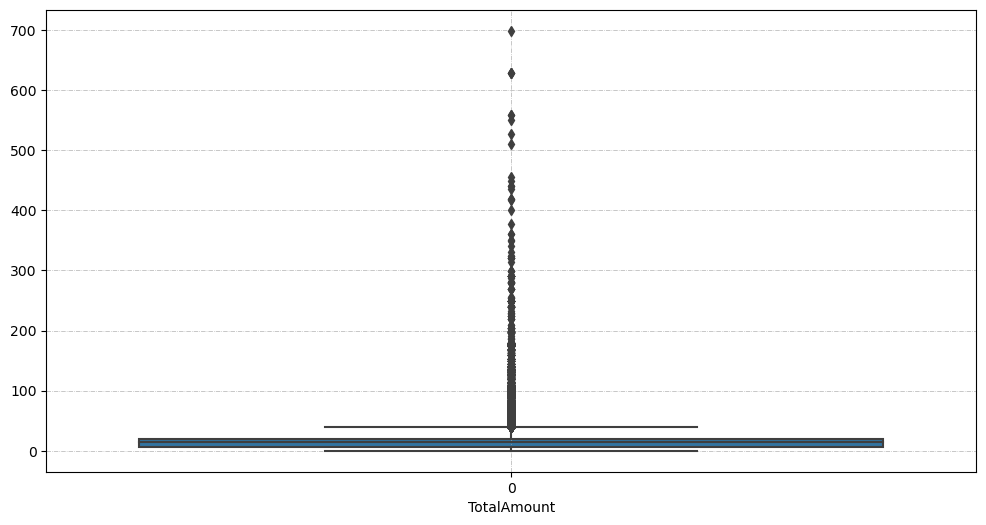

In [33]:
#boxplot of TotalAmount
plt.figure(figsize = (12,6))
sns.boxplot(df['TotalAmount'])
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)


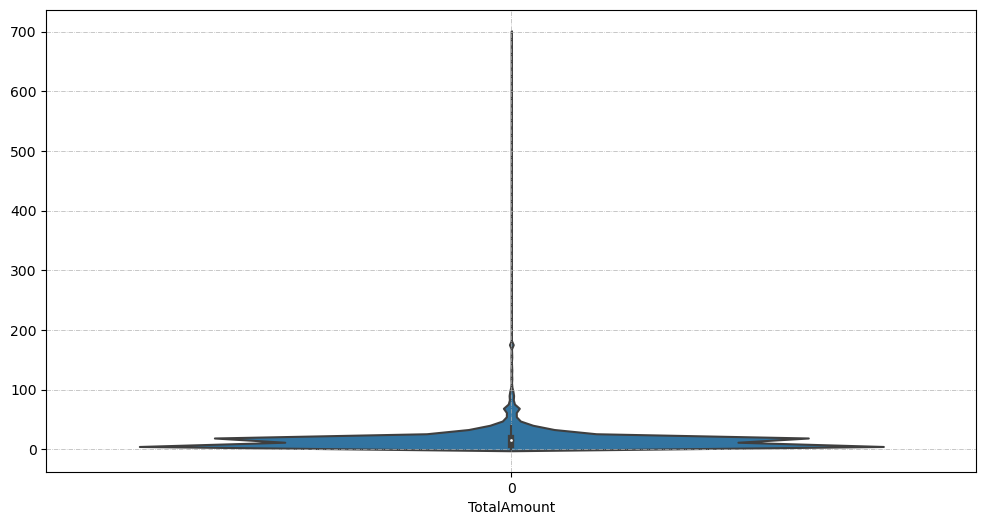

In [34]:
#violin plot of TotalAmount
plt.figure(figsize = (12,6))
sns.violinplot(df['TotalAmount'])
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)


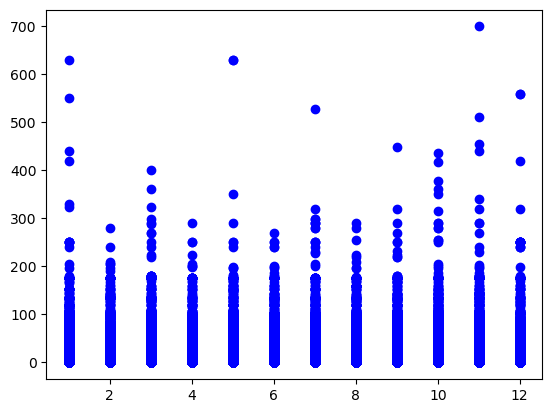

In [35]:
#scatter plot of TotalAmount vs month
plt.scatter(df['month'],df['TotalAmount'],color="blue")
plt.show()


### removing outliers of TotalAmount


In [36]:
max_TotalAmount=df['TotalAmount'].quantile(0.92)

In [37]:
a2=df[df['TotalAmount']>max_TotalAmount]

In [38]:
min_TotalAmount=df['TotalAmount'].quantile(0.08)

In [39]:
b2=df[df['TotalAmount']<min_TotalAmount]

In [40]:
df=df[(df['TotalAmount']<max_TotalAmount) & (df['TotalAmount']>min_TotalAmount)]

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


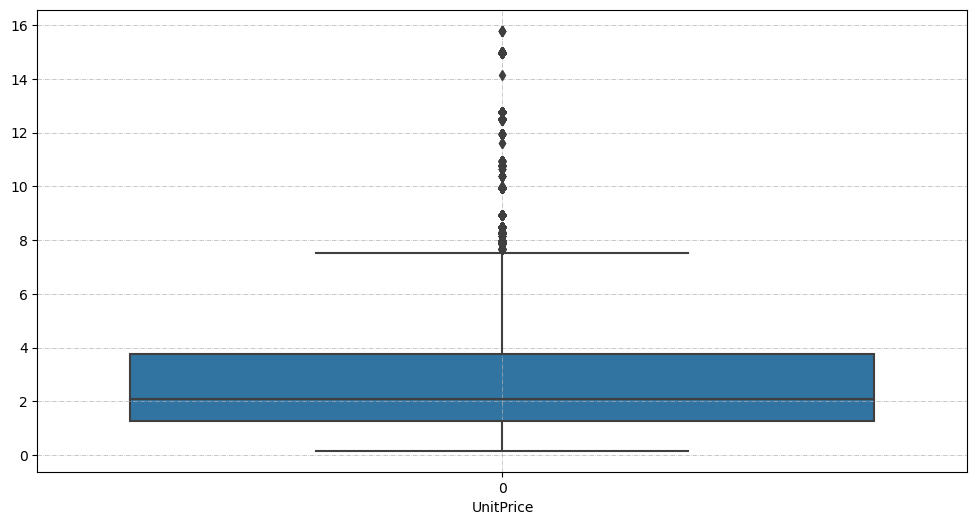

In [42]:

#boxplot of UnitPrice
plt.figure(figsize = (12,6))
sns.boxplot(df['UnitPrice'])
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)


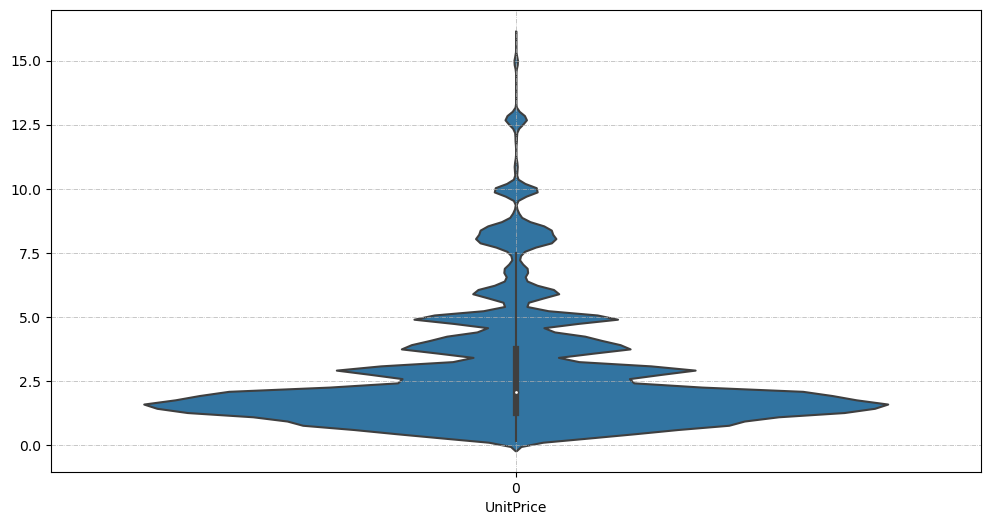

In [43]:

#violin plot of UnitPrice
plt.figure(figsize = (12,6))
sns.violinplot(df['UnitPrice'])
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)


In [44]:

#removing outliers of UnitPrice
max_UnitPrice=df['UnitPrice'].quantile(0.85)
a2=df[df['UnitPrice']>max_UnitPrice]
min_UnitPrice=df['UnitPrice'].quantile(0.15)
b2=df[df['UnitPrice']<min_UnitPrice]
df=df[(df['UnitPrice']<max_UnitPrice) & (df['UnitPrice']>min_UnitPrice)]


Text(0, 0.5, 'Quantity')

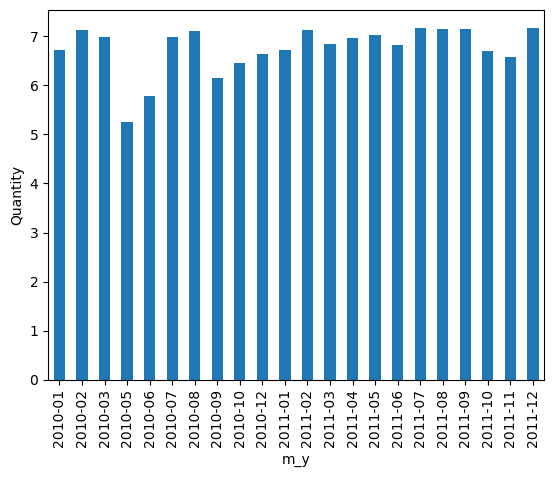

In [45]:

#bargraph of month wise quantity
df.groupby(['m_y'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')


Text(0, 0.5, 'UnitPrice')

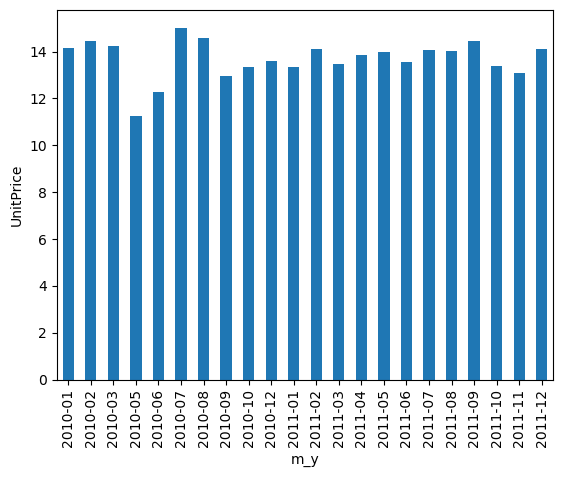

In [46]:

#bargraph of month wise TotalAmount
df.groupby(['m_y'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')


Text(0, 0.5, 'Quantity')

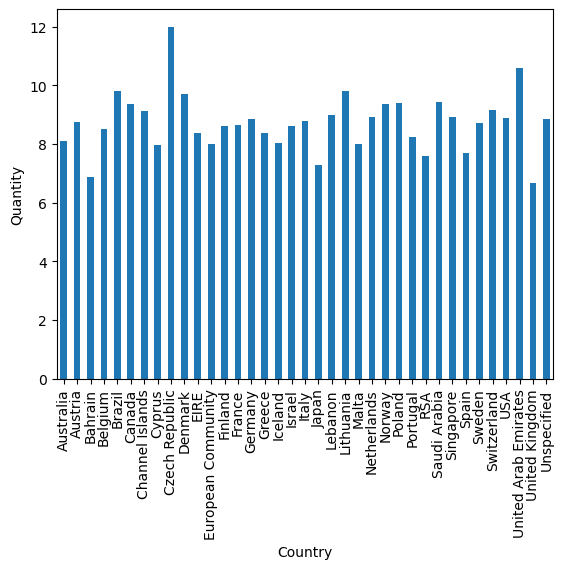

In [47]:

#bargraph of country wise quantity
df.groupby(['Country'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

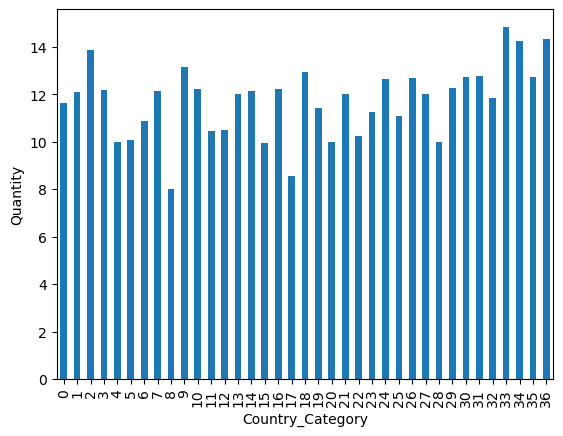

In [48]:

#bargraph of country wise hourly orders
df.groupby(['Country_Category'])['hour'].mean().plot(kind='bar')
plt.ylabel('Quantity')


Text(0, 0.5, 'UnitPrice')

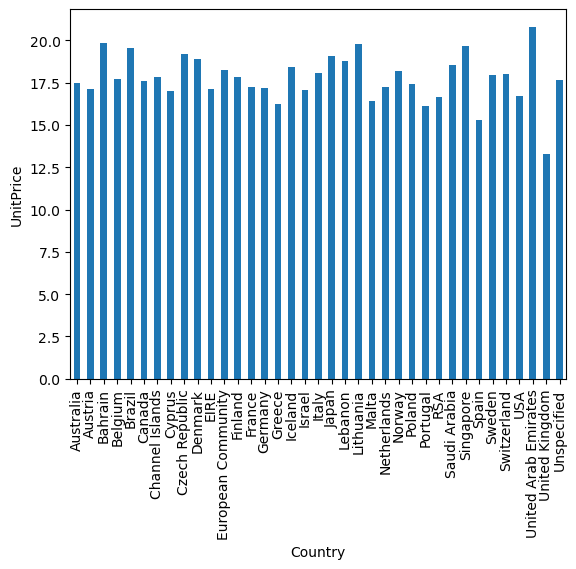

In [49]:

#bargraph of country wise TotalAmount
df.groupby(['Country'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')


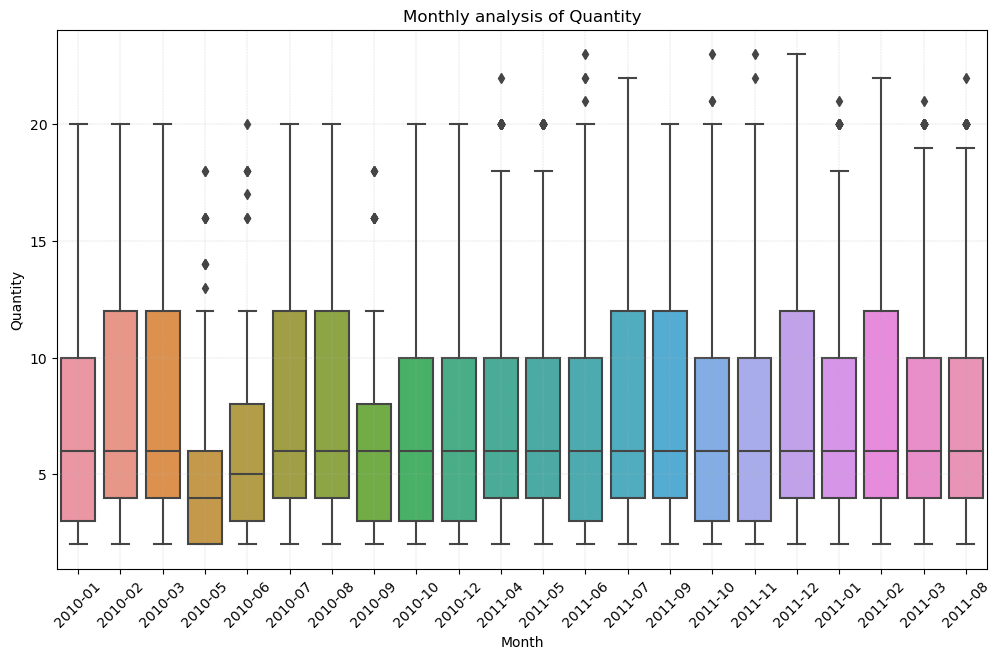

In [50]:

#boxplot of Quantity for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'Quantity', data = df)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Quantity')
plt.title("Monthly analysis of Quantity")
plt.grid(linestyle='-.',linewidth = .2)


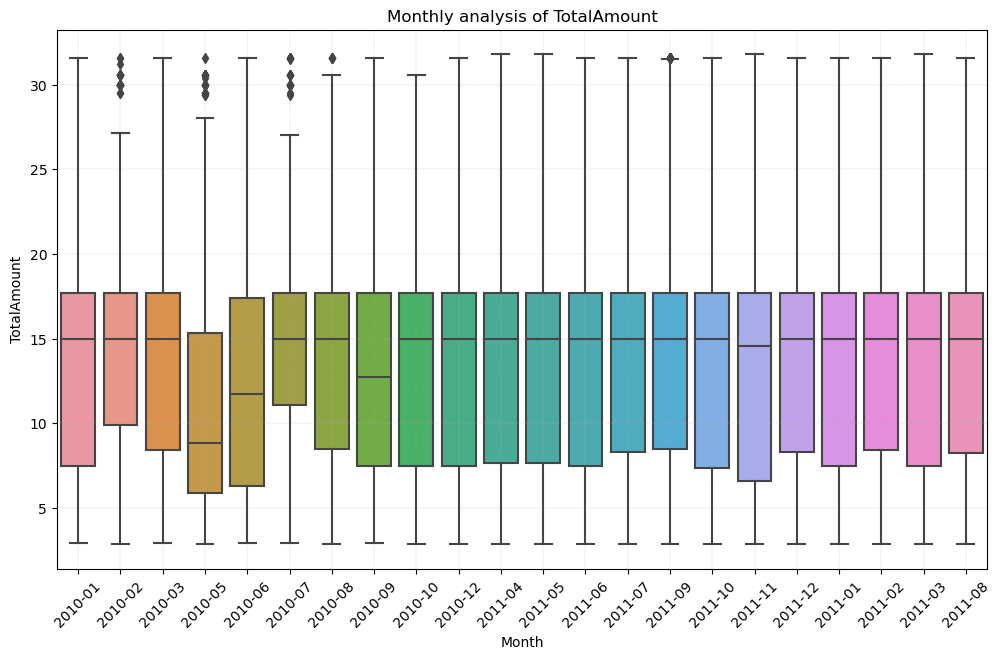

In [51]:

#boxplot of TotalAmount for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'TotalAmount', data = df)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('TotalAmount')
plt.title("Monthly analysis of TotalAmount")
plt.grid(linestyle='-.',linewidth = .2)


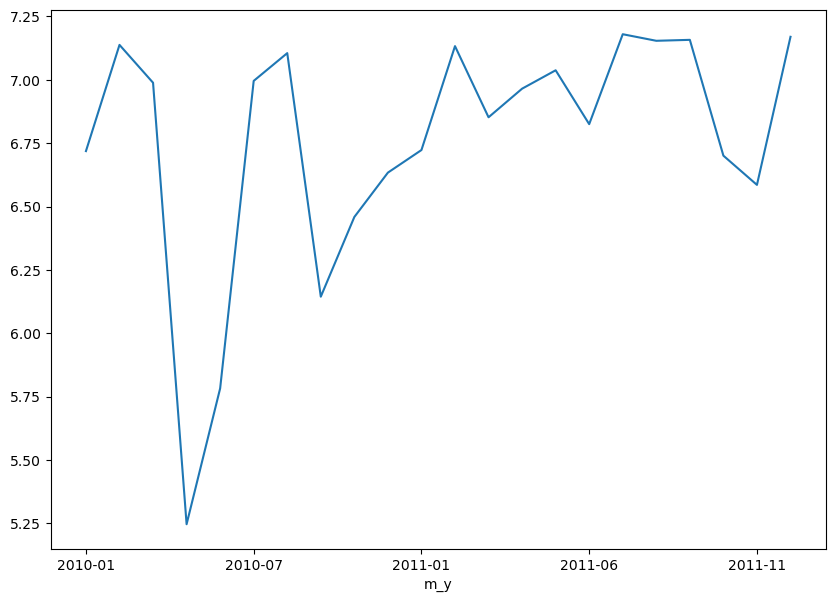

In [52]:

#linegraph of month vs quantity
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['Quantity'].mean().plot(ax=ax)
plt.show(fig,ax)


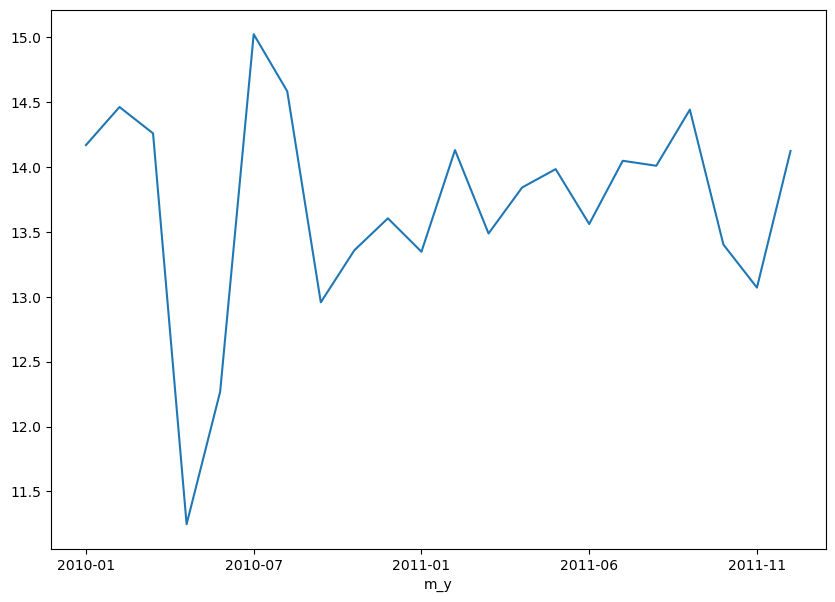

In [53]:

#linegraph of monty vs TotalAmount
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['TotalAmount'].mean().plot(ax=ax)
plt.show(fig,ax)


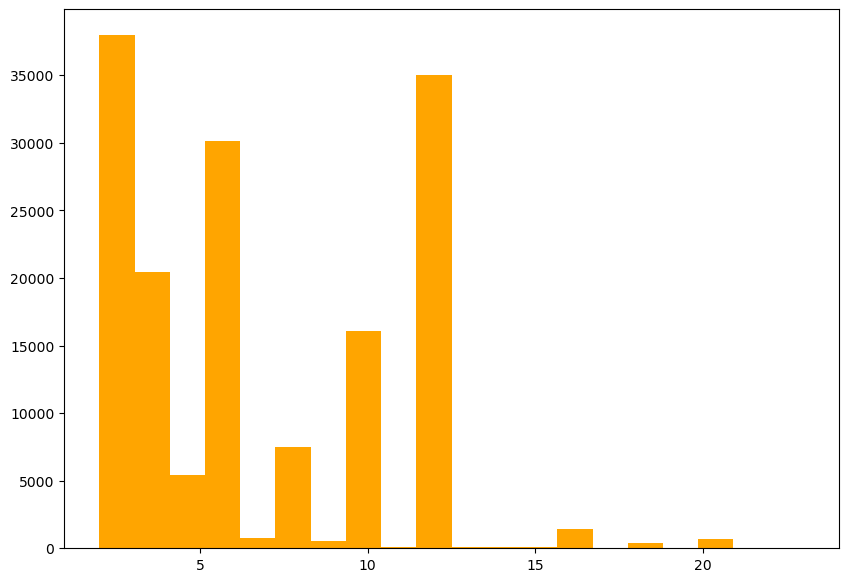

In [54]:


#histogram of quantity
plt.figure(figsize=(10,7))
plt.hist(df['Quantity'],color='orange', bins=20)
plt.show()


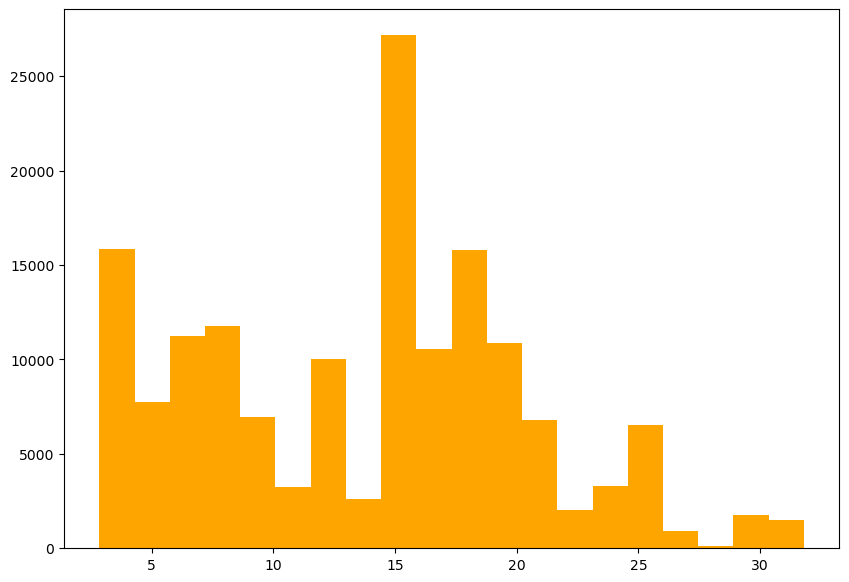

In [55]:

#histogram of TotalAmount
plt.figure(figsize=(10,7))
plt.hist(df['TotalAmount'],color='orange', bins=20)
plt.show()


C:\Users\Pratik\AppData\Local\Temp\ipykernel_3528\3371941803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'],kde=True,bins=20)


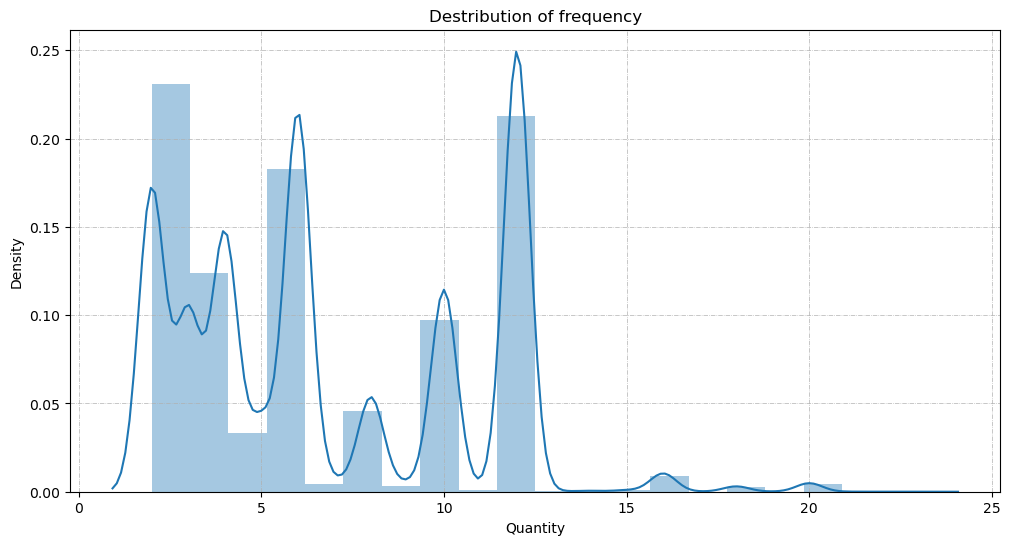

In [56]:


#distplot of quantity
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'],kde=True,bins=20)
plt.xlabel("Quantity")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\AppData\Local\Temp\ipykernel_3528\3928418976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalAmount'],kde=True,bins=20)


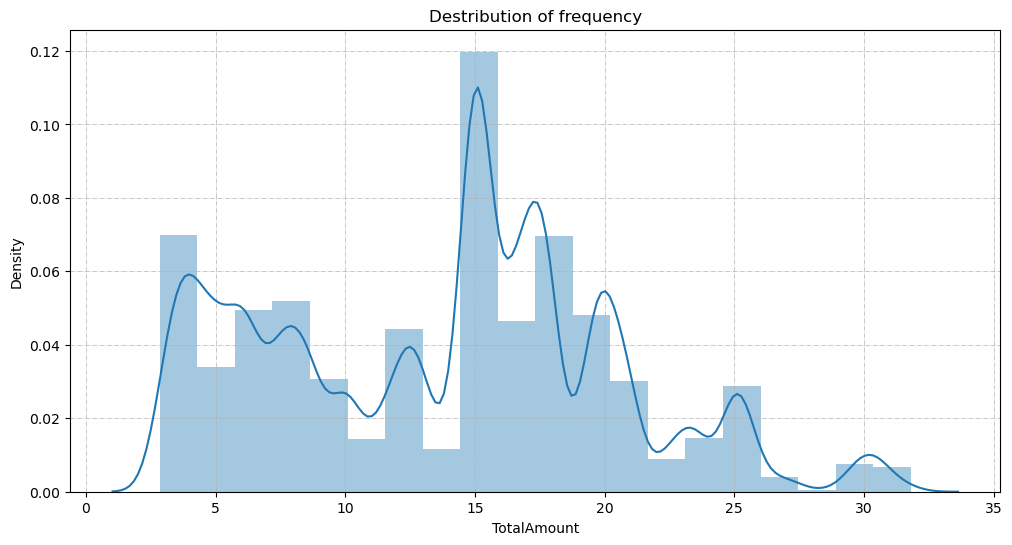

In [57]:
#distplot of TotalAmount
plt.figure(figsize = (12,6))
sns.distplot(df['TotalAmount'],kde=True,bins=20)
plt.xlabel("TotalAmount")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)


In [61]:
#regplot of country vs total amount
# sns.regplot(df['TotalAmount'],df['Country_Category'],color="blue")
# plt.show()


Text(0, 0.5, 'Customers')

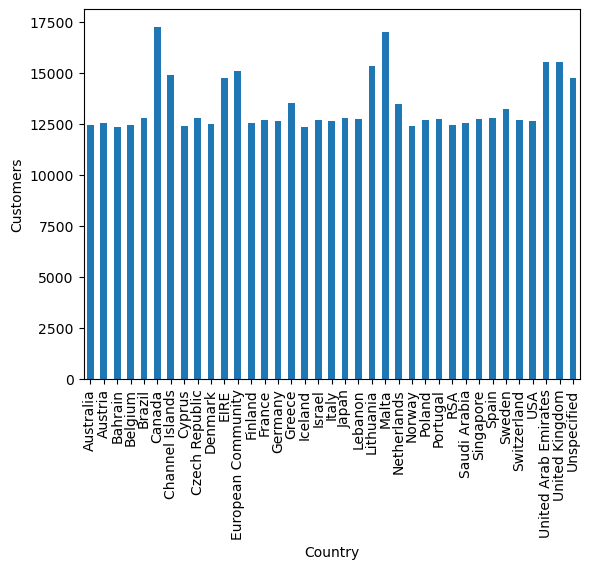

In [62]:
#bargraph of country wise customers
df.groupby(['Country'])['CustomerID'].mean().plot(kind='bar')
plt.ylabel('Customers')



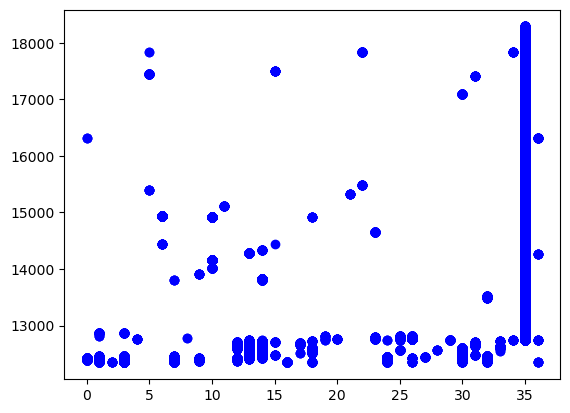

In [63]:
#scatter plot of Country_Category vs CustomerID
plt.scatter(df['Country_Category'],df['CustomerID'],color="blue")
plt.show()


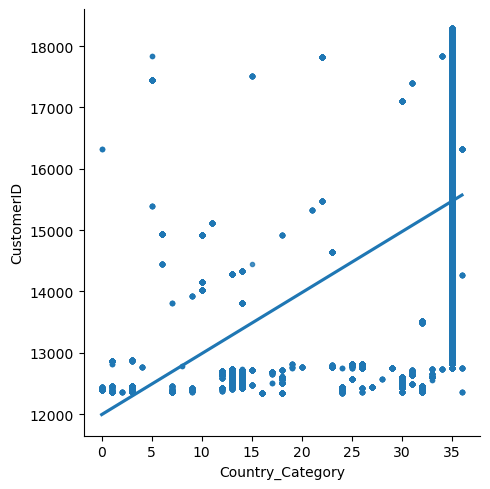

In [64]:
sns.lmplot(x='Country_Category',y='CustomerID',data=df,markers='.')


In [65]:
#find the number of unique values in columns
len(pd.unique(df['Description']))


2411

In [66]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,2011-09-12 12:50:00,1.95,23.40,12680.0,France,9,12,2011,12,2011-09,13
541903,18535,2088,706,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [67]:
len(pd.unique(df['Country']))


37

In [68]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,2011-09-12 12:50:00,1.95,23.40,12680.0,France,9,12,2011,12,2011-09,13
541903,18535,2088,706,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [69]:
#create the dependant and independant variables
X=df.drop(['Country_Category','m_y','InvoiceDate','Country'],axis=1)


In [70]:
Y=df['Country_Category'].values.reshape(-1,1)

In [71]:
X.dtypes

InvoiceNo        int16
StockCode        int16
Description      int16
Quantity         int64
UnitPrice      float64
TotalAmount    float64
CustomerID     float64
month            int64
day_number       int64
year             int64
hour             int64
dtype: object

In [72]:
#Perform lasso regression on the data
names=X.columns


In [73]:
lasso=Lasso(alpha=0.2)


In [74]:
lasso_coef=lasso.fit(X,Y).coef_


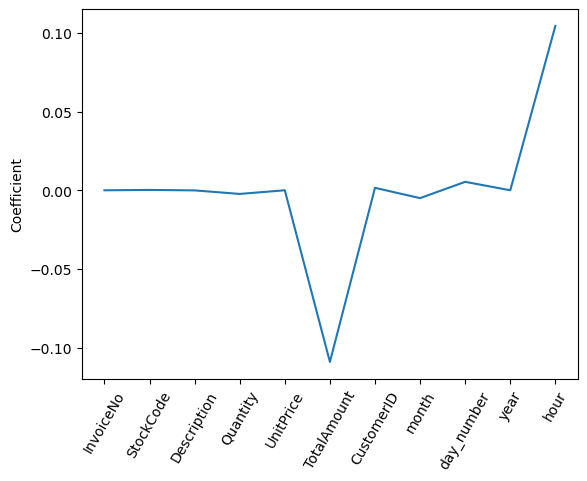

In [75]:
#plot a graph showing the coefficients of each independant variable
figure=plt.plot(range(len(names)),lasso_coef)
figure=plt.xticks(range(len(names)),names,rotation=60)
figure=plt.ylabel('Coefficient')
plt.show()


In [76]:
#create a function to find out the root mean squared error
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv = 5))
    return(rmse)


In [77]:
#perform lasso regression
model_lasso = LassoCV(alphas = [1, 0.1 , 0.001, 0.0005], selection = 'random', max_iter=15000).fit(X,Y)
res= rmse_cv(model_lasso)


C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when 

In [78]:
#find out the min and mean root mean squared error
print("Mean:",res.mean())
print("Min:",res.min())


Mean: 6.27112526010699
Min: 5.956665429834934


In [79]:
#print the coefficient that lasso picked
coeff = pd.Series(model_lasso.coef_,index = X.columns)
print("Lasso picked "+ str(sum(coeff!=0))+" Variables and eliminated and the other "+ str(sum(coeff == 0))+" variables")


Lasso picked 9 Variables and eliminated and the other 2 variables


In [80]:
#coefficients of all the columns
imp_coef = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

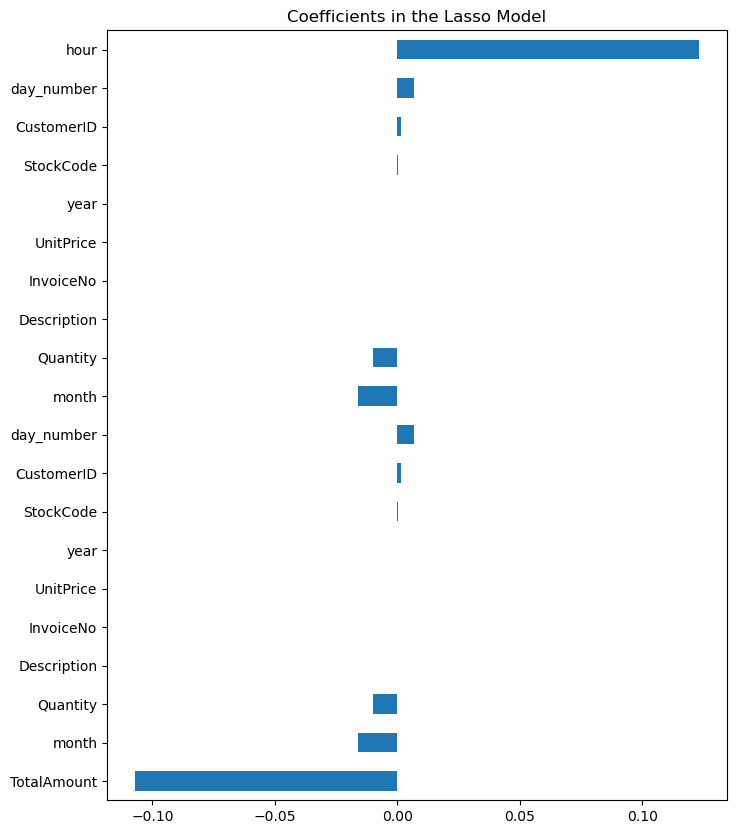

In [81]:
#plot the graph of lasso regression 
matplotlib.rcParams['figure.figsize'] =(8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


In [82]:
#Perform ridge regression on the data
ridge=Ridge(alpha=0.2)
ridge_coef=ridge.fit(X,Y).coef_


In [83]:
#perform ridge regression
model_ridge = RidgeCV(alphas = [11,1, 0.1 , 0.001, 0.0005]).fit(X,Y)
res = rmse_cv(model_ridge)


In [84]:
#find out the min and mean root mean squared error
model_ridge.coef_
print("Mean:",res.mean())
print("Min:",res.min())


Mean: 6.269724543284031
Min: 5.951770587374064


In [85]:
print("Ridge Regression picked "+ str(sum(coeff!=0))+" Variables and eliminated the other "+ str(sum(coeff == 0))+" variables")


Ridge Regression picked 9 Variables and eliminated the other 2 variables


In [86]:
#coefficients of all the columns
imp_coef = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])


Text(0.5, 1.0, 'Coefficients in the Ridge Regression Model')

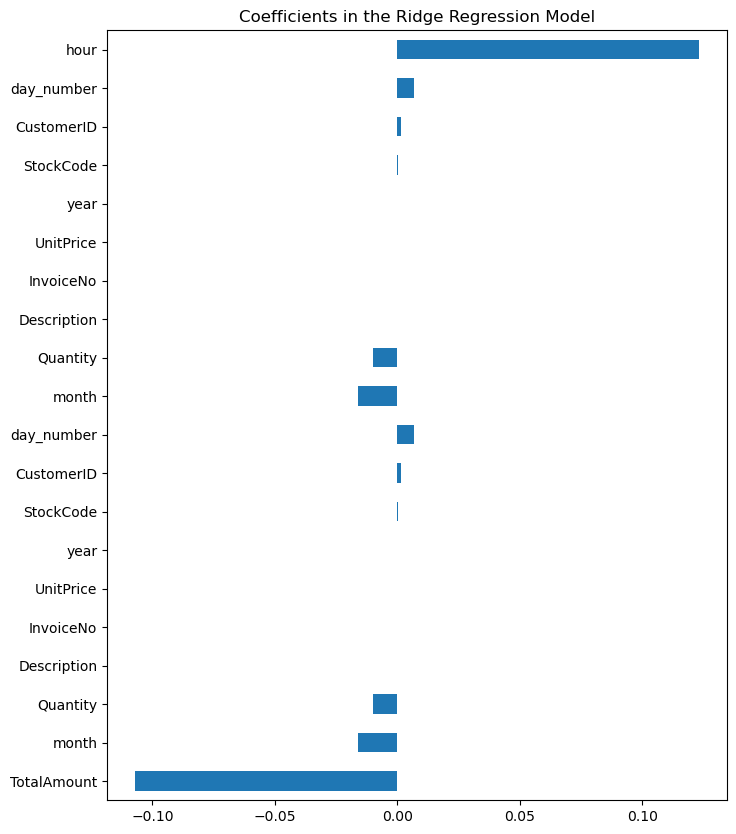

In [87]:
#plot the graph of ridge regression 
matplotlib.rcParams['figure.figsize'] =(8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Regression Model")


In [88]:
#copy df into a new dataset
df1=df.copy()
df1.info()
df1=df1.drop(['m_y','InvoiceDate','Country'],axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 156799 entries, 0 to 541907
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         156799 non-null  int16         
 1   StockCode         156799 non-null  int16         
 2   Description       156799 non-null  int16         
 3   Quantity          156799 non-null  int64         
 4   InvoiceDate       156799 non-null  datetime64[ns]
 5   UnitPrice         156799 non-null  float64       
 6   TotalAmount       156799 non-null  float64       
 7   CustomerID        156799 non-null  float64       
 8   Country           156799 non-null  object        
 9   month             156799 non-null  int64         
 10  day_number        156799 non-null  int64         
 11  year              156799 non-null  int64         
 12  hour              156799 non-null  int64         
 13  m_y               156799 non-null  object        
 14  Coun

In [89]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount,CustomerID,month,day_number,year,hour,Country_Category
0,0,3249,3716,6,2.55,15.30,17850.0,1,12,2010,8,35
1,0,2649,3724,6,3.39,20.34,17850.0,1,12,2010,8,35
2,0,2855,861,8,2.75,22.00,17850.0,1,12,2010,8,35
3,0,2803,1813,6,3.39,20.34,17850.0,1,12,2010,8,35
4,0,2802,2776,6,3.39,20.34,17850.0,1,12,2010,8,35
...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,1.95,23.40,12680.0,9,12,2011,12,13
541903,18535,2088,706,4,4.15,16.60,12680.0,9,12,2011,12,13
541905,18535,1746,695,6,2.10,12.60,12680.0,9,12,2011,12,13
541906,18535,2086,701,4,4.15,16.60,12680.0,9,12,2011,12,13


In [90]:
#scale down the values of the dataset
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)
print(scaled_data)

[[-1.79879315  2.03588899  1.61406399 ... -3.84479989 -2.04840841
   0.33142014]
 [-1.79879315  1.30414379  1.62166861 ... -3.84479989 -2.04840841
   0.33142014]
 [-1.79879315  1.55537631 -1.09983588 ... -3.84479989 -2.04840841
   0.33142014]
 ...
 [ 1.67712856  0.20286726 -1.25763181 ...  0.26009156 -0.29307676
  -2.8525794 ]
 [ 1.67712856  0.61752287 -1.25192835 ...  0.26009156 -0.29307676
  -2.8525794 ]
 [ 1.67712856  0.61874245 -1.25287892 ...  0.26009156 -0.29307676
  -2.8525794 ]]


In [91]:

#perform PCA
pca=PCA(n_components=2)
pca.fit(df1)
x_pca=pca.transform(df1)
print(x_pca)

[[ 9554.13292346  2632.71033878]
 [ 9563.93790372  2625.06402161]
 [ 9573.98565024  2629.12164959]
 ...
 [-8937.34786622 -2565.50526501]
 [-8942.95330036 -2561.18134718]
 [-8942.96501455 -2561.16811357]]


In [92]:
#the dimensionality is reduced to 3
x_pca.shape


(156799, 2)

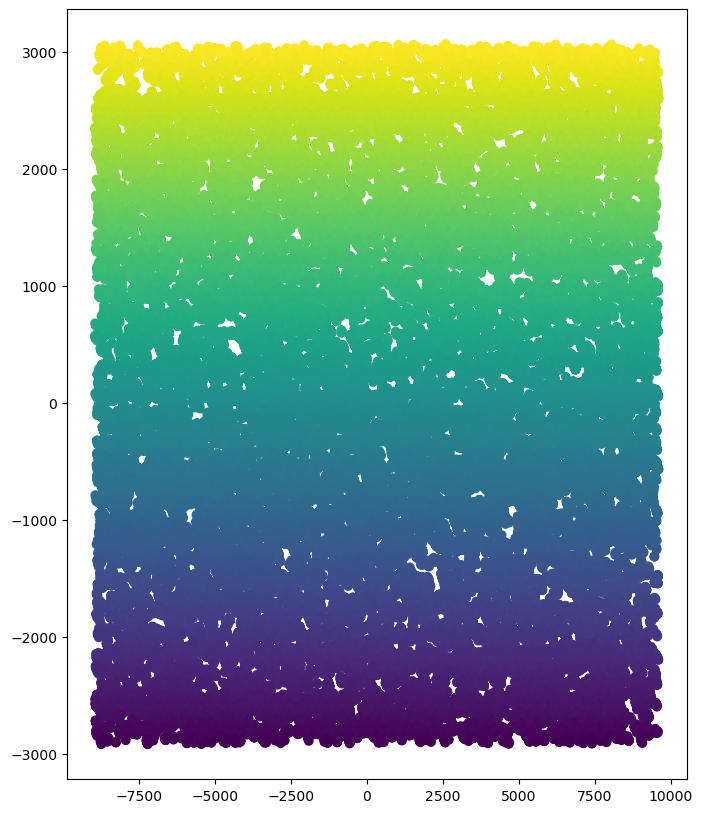

In [93]:
#plot the x_pca
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['CustomerID'])


In [94]:
#drop unwanted columns and create independant and dependant variables for non linear algorithms
X1=X.drop(['InvoiceNo','Description','UnitPrice'],axis=1)
Y1=Y


In [95]:
#split train and test data
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3)


In [96]:
#perform decision tree algorithm
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
y_pred

array([35, 10, 35, ..., 35, 35, 14], dtype=int8)

In [97]:
#print the accuracy score for decision tree
print(accuracy_score(y_test,y_pred))


0.998639455782313


In [98]:
#classification report of decision tree
cr_dt=classification_report(y_test, y_pred)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00         5
           3       1.00      0.99      1.00       317
           4       1.00      1.00      1.00         4
           5       0.94      0.77      0.85        22
           6       0.98      1.00      0.99        95
           7       1.00      1.00      1.00        70
           8       0.33      1.00      0.50         1
           9       0.97      1.00      0.99        39
          10       1.00      1.00      1.00       904
          11       1.00      0.90      0.95        10
          12       0.95      0.96      0.96        81
          13       0.99      0.99      0.99      1113
          14       1.00      1.00      1.00      1313
          15       1.00      0.93      0.96        14
          16       1.00      1.00      1.00        36
          17       1.00    

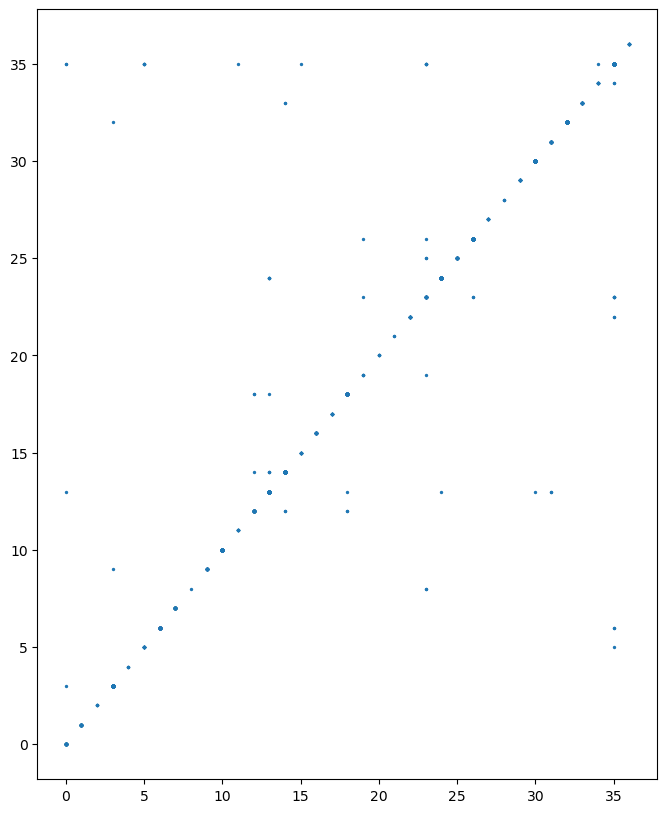

In [99]:
#using regplot for decision tree
# sns.regplot(y_test,y_pred,order=1, ci=None, scatter_kws={'color':'black', 's':10})
plt.scatter(y_test,y_pred,s=2)


In [100]:
#perform support vector machine algorithm
svm1 = SVC()


In [101]:
svm1.fit(x_train,y_train)


C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [102]:
y_pred = svm1.predict(x_test)
y_pred

array([35, 35, 35, ..., 35, 35, 14], dtype=int8)

In [103]:
#print accuracy score for support vector machine
print(accuracy_score(y_test,y_pred))


0.909906462585034


In [104]:
#classification report of support vector machine
cr_svm1=classification_report(y_test, y_pred)
print(cr_svm1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       317
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00       904
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        81
          13       0.45      0.03      0.05      1113
          14       0.32      0.85      0.47      1313
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        36
          17       0.00    

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
#using regplot for support vector machine
# sns.regplot(y_test,y_pred,order=1, ci=None, scatter_kws={'color':'black', 's':10})


In [107]:
#perform random forest algorithm
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)


C:\Users\Pratik\AppData\Local\Temp\ipykernel_3528\809611794.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


In [108]:
#print accuracy score for random forest
print(accuracy_score(y_test,y_pred))


0.9915603741496599


In [109]:
#classification report of random forest
cr_rfc=classification_report(y_test, y_pred)
print(cr_rfc)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        61
           1       1.00      0.89      0.94        54
           2       1.00      0.80      0.89         5
           3       0.95      0.98      0.96       317
           4       1.00      0.50      0.67         4
           5       1.00      0.59      0.74        22
           6       1.00      0.95      0.97        95
           7       0.95      0.99      0.97        70
           8       1.00      1.00      1.00         1
           9       0.97      0.95      0.96        39
          10       0.99      0.93      0.96       904
          11       1.00      0.80      0.89        10
          12       1.00      0.80      0.89        81
          13       0.94      0.96      0.95      1113
          14       0.96      0.95      0.96      1313
          15       1.00      0.71      0.83        14
          16       1.00      0.97      0.99        36
          17       1.00    

In [110]:
#using regplot for random forest
sns.regplot(y_test,y_pred,order=1, ci=None, scatter_kws={'color':'black', 's':10})



TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

In [111]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,2011-09-12 12:50:00,1.95,23.40,12680.0,France,9,12,2011,12,2011-09,13
541903,18535,2088,706,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [112]:
data = df.drop(['InvoiceDate','Country','m_y'], axis=1)

In [113]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount,CustomerID,month,day_number,year,hour,Country_Category
0,0,3249,3716,6,2.55,15.30,17850.0,1,12,2010,8,35
1,0,2649,3724,6,3.39,20.34,17850.0,1,12,2010,8,35
2,0,2855,861,8,2.75,22.00,17850.0,1,12,2010,8,35
3,0,2803,1813,6,3.39,20.34,17850.0,1,12,2010,8,35
4,0,2802,2776,6,3.39,20.34,17850.0,1,12,2010,8,35
...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,1.95,23.40,12680.0,9,12,2011,12,13
541903,18535,2088,706,4,4.15,16.60,12680.0,9,12,2011,12,13
541905,18535,1746,695,6,2.10,12.60,12680.0,9,12,2011,12,13
541906,18535,2086,701,4,4.15,16.60,12680.0,9,12,2011,12,13


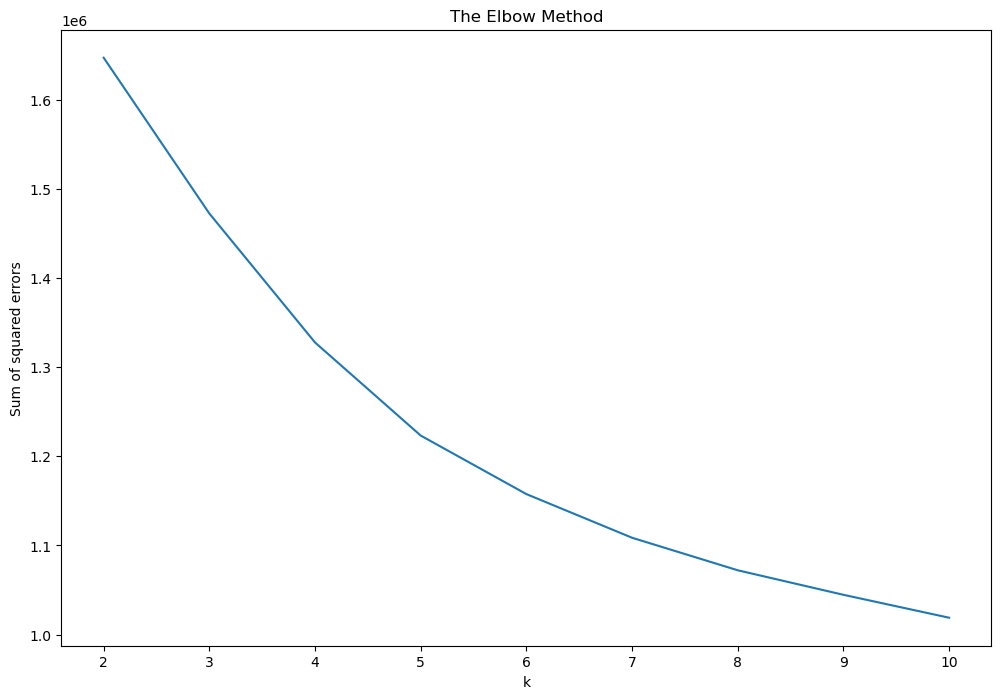

In [116]:
#create a suitable range of clusters
wcss = [] 
for i in range(2, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data) 
    wcss.append(kmeans.inertia_)
#plot a graph to finalise cluster number by using the elbow rule

plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
plt.plot(range(2, 11),wcss)
plt.show()

In [117]:
#perform KMeans clustering
kmeans=KMeans(n_clusters=5)


In [119]:
y_predicted=kmeans.fit_predict(scaled_data)


In [120]:
df['cluster']=y_predicted


C:\Users\Pratik\AppData\Local\Temp\ipykernel_3528\3640582189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


In [121]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category,cluster
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35,2
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35,2
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35,2
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35,2
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,2011-09-12 12:50:00,1.95,23.40,12680.0,France,9,12,2011,12,2011-09,13,3
541903,18535,2088,706,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13,3
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13,3
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13,3


In [122]:
#create datasets with different specific cluster values
cluster1=df[df.cluster==0]
cluster2=df[df.cluster==1]
cluster3=df[df.cluster==2]
cluster4=df[df.cluster==3]
cluster5=df[df.cluster==4]


In [125]:
#find the centroids of each clusters
centroids=kmeans.cluster_centers_


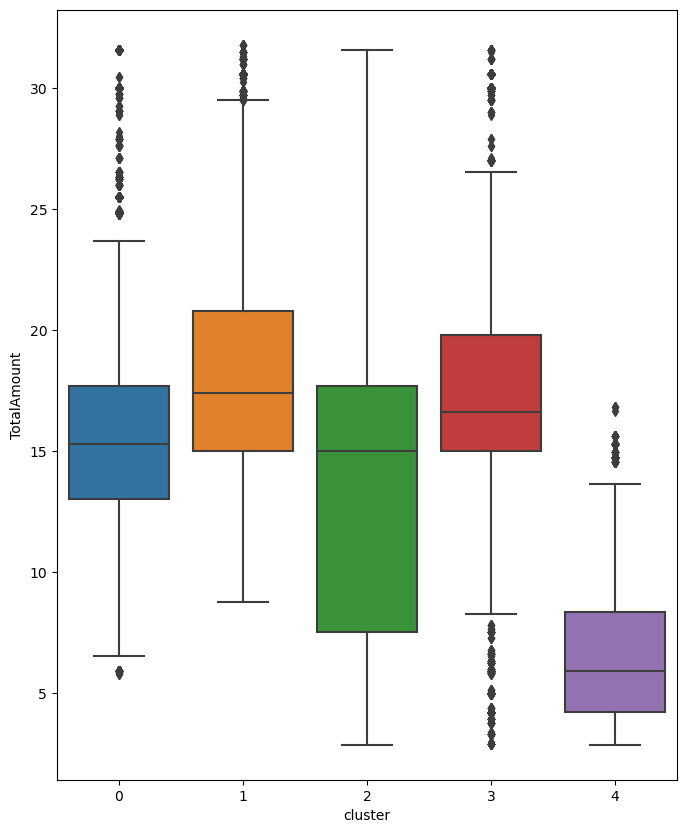

In [127]:
sns.boxplot(x='cluster', y='TotalAmount', data=df)

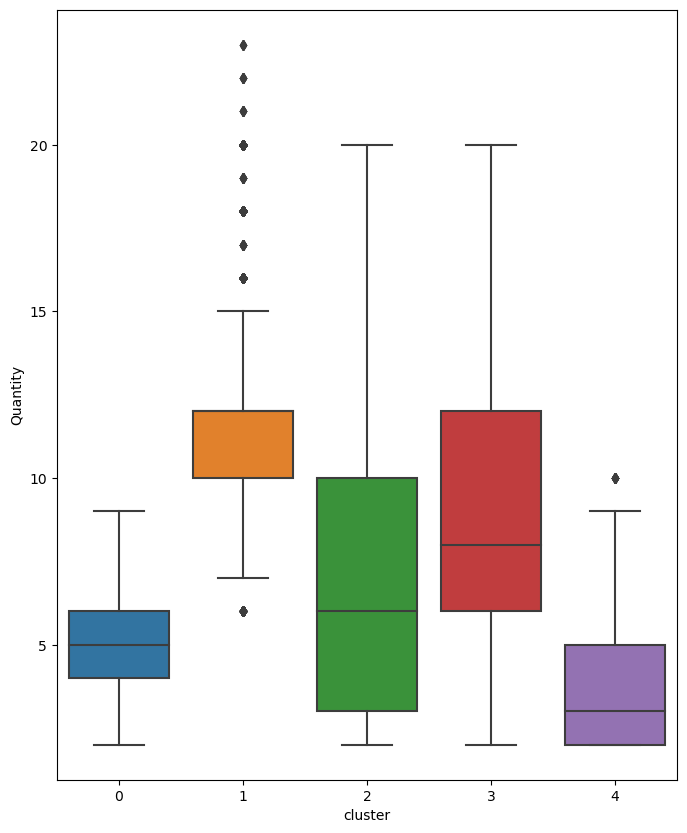

In [128]:
sns.boxplot(x='cluster', y='Quantity', data=df)

In [ ]:

#copy data from df into new dataset for hierarchical clustering
h_data=data[['Country_Codes','CustomerID']].copy()
h_data.info()
h_data['CustomerID']=h_data["CustomerID"].astype('int')
